# AlexNet model

### AlexNet with TIRADS

## Get packages

In [4]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
import albumentations as A
import cv2

from skimage.io import imread
from skimage.io import imshow
from skimage.util import crop
from skimage.transform import resize
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import regularizers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras import models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback

## Paths

In [1]:
TRAIN_PATH = 'archive/classification/tirads/frame/neaug/train'
TEST_PATH = 'archive/classification/tirads/frame/neaug/test'
VALID_PATH = 'archive/classification/tirads/frame/neaug/validate'

In [2]:
input_size = (3,227,227)

## Load and Prepare Images

In [5]:

# for neaug frame
# divisible with 258: 2, 3, 6, 43, 86, 129 
train_batchsize = 6
# divisible with 52: 2, 4, 13 
valid_batchsize = 4


# #for aug frame
# # divisible with 518: 2, 259.
# train_batchsize = 2
# # divisible with 52: 2, 4, 13 
# valid_batchsize = 4


# #for balance frame
# # divisible with 426: 2, 3, 6, 71, 142, 213
# train_batchsize = 6
# # divisible with 18: 2, 3, 6, 9
# valid_batchsize = 3


# # for neaug no frame
# # divisible with 258: 2, 3, 6, 43, 86, 129 
# train_batchsize = 6
# # divisible with 52: 2, 4, 13 
# valid_batchsize = 4


# #for aug no frame
# # divisible with 518: 2, 259
# train_batchsize = 2
# # divisible with 52: 2, 4, 13 
# valid_batchsize = 4


# #for balance no frane
# # divisible with 426: 2, 3, 6, 71, 142, 213
# train_batchsize = 6
# # divisible with 18: 2, 3, 6, 9
# valid_batchsize = 3




# S-a folosit din totalul datelor 75% pentru validare si antrenare 15% pt testare 10%
train_datagen = ImageDataGenerator(rescale=1./255

)

validation_datagen = ImageDataGenerator(rescale=1./255)
                                  

train_generator = train_datagen.flow_from_directory(
        TRAIN_PATH,  
        shuffle=True,
         batch_size=train_batchsize,
        target_size=input_size[1:],
        class_mode='categorical')  

validation_generator = validation_datagen.flow_from_directory(
        VALID_PATH,  
        target_size=input_size[1:],
        shuffle=True,
         batch_size=valid_batchsize,
        class_mode='categorical')

Found 258 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


## Make the model

### From scratch

#### Complex Model

In [91]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding="valid"))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(200, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.25))

# 2nd Fully Connected Layer
model.add(Dense(100))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.2))

# 3rd Fully Connected Layer
model.add(Dense(50))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(6))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 54, 54, 32)        11648     
                                                                 
 activation_40 (Activation)  (None, 54, 54, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 27, 27, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 17, 17, 64)        247872    
                                                                 
 activation_41 (Activation)  (None, 17, 17, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                

#### Simple model

In [10]:

model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, (3, 3), input_shape=(227, 227, 3)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense Layers
model.add(Flatten())

model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax')) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 225, 225, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 225, 225, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 activation_6 (Activation)   (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                 

In [15]:
train_generator.class_indices

{'2': 0, '3': 1, '4a': 2, '4b': 3, '4c': 4, '5': 5}

## Train the model

In [11]:
class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate
        if isinstance(lr, tf.Variable) or tf.is_tensor(lr):
            lr = tf.keras.backend.get_value(lr)
        print(f" Epoch {epoch+1}: Learning rate is {lr:.6f}")

In [12]:
# Compile the model
model.compile(
              loss=keras.losses.CategoricalCrossentropy(), 
#               loss=keras.losses.BinaryFocalCrossentropy(),
           optimizer=keras.optimizers.legacy.Adamax(learning_rate=0.001),
              metrics=['accuracy'],
    
             )

In [13]:
# Se antreneaza modelul
checkpoiter = tf.keras.callbacks.ModelCheckpoint('model_alexnet_tirads_bun.h5', verbose=1, save_best_only=True)
steps = train_generator.samples//train_generator.batch_size
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=4, min_lr=0.00001, verbose=1)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    reduce_lr,
    LearningRateLogger(),
    checkpoiter

]

results = model.fit(train_generator, 
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    steps_per_epoch = steps,
                    shuffle=True,
                    epochs=50, 
                    callbacks=callbacks,
                   )

Epoch 1/50
43/43 [==============================] - ETA: 0s - loss: 4.4011 - accuracy: 0.1977 Epoch 1: Learning rate is 0.001000

Epoch 1: val_loss improved from inf to 3.56642, saving model to model_alexnet_tirads_bun.h5
43/43 [==============================] - 6s 125ms/step - loss: 4.4011 - accuracy: 0.1977 - val_loss: 3.5664 - val_accuracy: 0.2308 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - ETA: 0s - loss: 3.3330 - accuracy: 0.2752 Epoch 2: Learning rate is 0.001000

Epoch 2: val_loss improved from 3.56642 to 3.06280, saving model to model_alexnet_tirads_bun.h5
43/43 [==============================] - 6s 130ms/step - loss: 3.3330 - accuracy: 0.2752 - val_loss: 3.0628 - val_accuracy: 0.2692 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - ETA: 0s - loss: 2.9239 - accuracy: 0.2364 Epoch 3: Learning rate is 0.001000

Epoch 3: val_loss improved from 3.06280 to 2.78767, saving model to model_alexnet_tirads_bun.h5
43/43 [==============================]

43/43 [==============================] - 7s 151ms/step - loss: 2.2297 - accuracy: 0.3062 - val_loss: 2.2480 - val_accuracy: 0.3462 - lr: 1.0000e-05
Epoch 23/50
43/43 [==============================] - ETA: 0s - loss: 2.2389 - accuracy: 0.2713 Epoch 23: Learning rate is 0.000010

Epoch 23: val_loss did not improve from 2.24802
43/43 [==============================] - 6s 150ms/step - loss: 2.2389 - accuracy: 0.2713 - val_loss: 2.2481 - val_accuracy: 0.3462 - lr: 1.0000e-05
Epoch 24/50
43/43 [==============================] - ETA: 0s - loss: 2.2176 - accuracy: 0.3178 Epoch 24: Learning rate is 0.000010

Epoch 24: val_loss improved from 2.24802 to 2.24731, saving model to model_alexnet_tirads_bun.h5
43/43 [==============================] - 6s 150ms/step - loss: 2.2176 - accuracy: 0.3178 - val_loss: 2.2473 - val_accuracy: 0.3462 - lr: 1.0000e-05
Epoch 25/50
43/43 [==============================] - ETA: 0s - loss: 2.2001 - accuracy: 0.2364 Epoch 25: Learning rate is 0.000010

Epoch 25: val_l

43/43 [==============================] - 7s 159ms/step - loss: 2.1802 - accuracy: 0.3062 - val_loss: 2.2255 - val_accuracy: 0.3462 - lr: 1.0000e-05
Epoch 45/50
43/43 [==============================] - ETA: 0s - loss: 2.1583 - accuracy: 0.2946 Epoch 45: Learning rate is 0.000010

Epoch 45: val_loss improved from 2.22553 to 2.22355, saving model to model_alexnet_tirads_bun.h5
43/43 [==============================] - 7s 164ms/step - loss: 2.1583 - accuracy: 0.2946 - val_loss: 2.2236 - val_accuracy: 0.3462 - lr: 1.0000e-05
Epoch 46/50
43/43 [==============================] - ETA: 0s - loss: 2.1747 - accuracy: 0.2209 Epoch 46: Learning rate is 0.000010

Epoch 46: val_loss improved from 2.22355 to 2.22232, saving model to model_alexnet_tirads_bun.h5
43/43 [==============================] - 7s 163ms/step - loss: 2.1747 - accuracy: 0.2209 - val_loss: 2.2223 - val_accuracy: 0.3462 - lr: 1.0000e-05
Epoch 47/50
43/43 [==============================] - ETA: 0s - loss: 2.1887 - accuracy: 0.2713 Epo

## Results

In [14]:
print('Accuracy Score = ',np.max(results.history['val_accuracy']))
print('Loss Score = ',np.min(results.history['val_loss']))

Accuracy Score =  0.3461538553237915
Loss Score =  2.2170660495758057


In [29]:
import pickle
history = results.history

# Pickle the history to file
with open('file_name.pkl', 'wb') as f:
    pickle.dump(history, f)


### During training

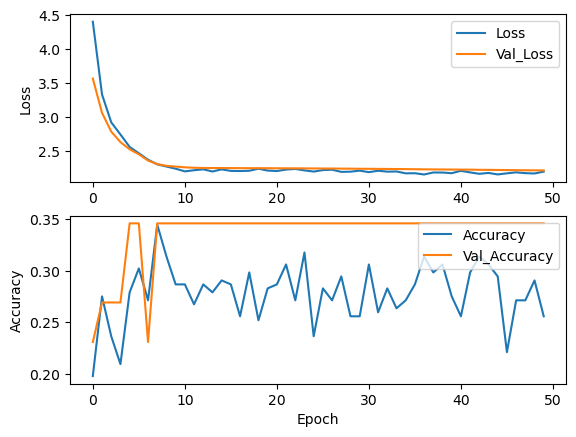

In [15]:
plt.figure()
plt.subplot(211)
loss_train_curve = results.history["loss"]
loss_val_curve = results.history["val_loss"]
plt.plot(loss_train_curve, label = "Loss")
plt.plot(loss_val_curve, label = "Val_Loss")
plt.legend(loc = 'upper right')
plt.ylabel("Loss")


plt.subplot(212)
acc_train_curve = results.history["accuracy"]
acc_val_curve = results.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Accuracy")
plt.plot(acc_val_curve, label = "Val_Accuracy")
plt.legend(loc = 'upper right')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [2]:
## Import the model

import pickle
ti_rads = tf.keras.models.load_model('model_alexnet_tirads_aug.h5')
with open('file_name.pkl', 'rb') as f:
    history = pickle.load(f)
acc = history['accuracy']  
ti_rads.summary()

from keras.utils import plot_model
import pydot
import graphviz
tf.keras.utils.plot_model(ti_rads, to_file='model_1.png', show_shapes=True)

## Test the model

In [16]:
# Predict Classes

# divisible with 36: 2, 3, 4, 6, 9, 12, 18
test_batch_size = 3

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=input_size[1:],
    batch_size=test_batch_size,
    shuffle=False,
class_mode='categorical')

scores = model.evaluate(test_generator,workers=12)
print(scores)

Found 37 images belonging to 6 classes.
13/13 [==============================] - 0s 18ms/step - loss: 2.2908 - accuracy: 0.1892
[2.2907679080963135, 0.18918919563293457]


### Make prediction

In [148]:
target_names = list(test_generator.class_indices.keys())
test_generator.reset()

Y_pred = model.predict(test_generator, verbose=1)

y_pred = np.argmax(Y_pred, axis=-1)
classes = test_generator.classes

print(classes)
print(y_pred)

print(sum(y_pred==classes)/len(test_generator.classes))

12/12 [==============================] - 1s 88ms/step
[0 0 0 0 0 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 5 5 5 5 5]
[4 4 3 4 4 5 4 3 4 4 5 5 4 4 4 4 3 4 4 4 4 4 4 4 3 4 5 4 4 4 4 4 4 4 4 4]
0.16666666666666666


### Confusion Matrix

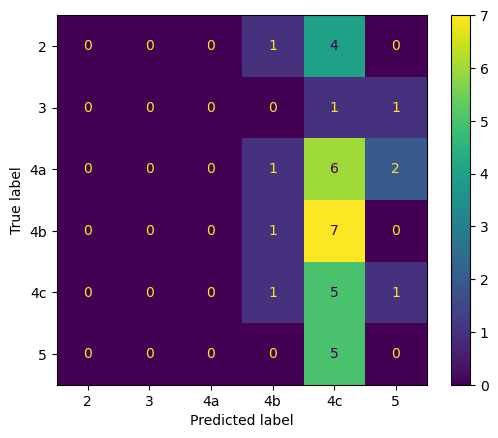

In [149]:
cm = confusion_matrix(classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot()
plt.grid(False)
plt.show()

### Metrics

In [150]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [151]:
def Average(FP):
    return sum(FP) / len(FP)
FP=Average(FP)

def Average1(FN):
    return sum(FN) / len(FN)
FN=Average1(FN)

def Average2(TP):
    return sum(TP) / len(TP)
TP=Average2(TP)

def Average3(TN):
    return sum(TN) / len(TN)
TN=Average3(TN)


print("True positive=",TP)
print("True Negative=",TN)
print("False positive=",FP)
print("False Negative=",FN)

True positive= 1.0
True Negative= 25.0
False positive= 5.0
False Negative= 5.0


In [152]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
#F1_SCORE
FSCO=(2*TP) / ((2*TP) +FP + FN) 
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [153]:
print("sensitivity=",round(TPR*100,3),"%")
print("precision=",round(PPV*100,3),"%")
print("Specificity=",round(TNR*100,3),"%")
print("F-score=",round(FSCO*100,3),"%")
print("ACCURACY=",round(ACC*100,3),"%")
print("FNR=",FNR*100,"%")
print("FPR=",FPR*100,"%")
print("NPV=",NPV*100,"%")

sensitivity= 16.667 %
precision= 16.667 %
Specificity= 83.333 %
F-score= 16.667 %
ACCURACY= 72.222 %
FNR= 83.33333333333334 %
FPR= 16.666666666666664 %
NPV= 83.33333333333334 %
